<a href="https://colab.research.google.com/github/quciya/Solar_radiation_prediction/blob/main/SOLARradiationusingRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
! pip install h5py==2.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/drive/MyDrive/Solar_radiation/Dataset/Pokhara_data_thesis.xlsx')
df.head(20)

,S.No,Susshine_Hour_(n),Daylength(N),Radiation MJ/M2/Day,Rainfall (mm),R.H(8:45),R.H(17:45),T.max,T.min,Wind Speed
0,1.0,DNA,NaN,5.165280,0.0,86.1,57.1,20.0,2.5,-99.9
1,2.0,3.3,NaN,5.033088,0.0,88.2,65.0,19.0,2.0,1.5
2,3.0,1.0,NaN,5.278930,0.0,96.8,71.8,18.0,1.8,0.7
3,4.0,4.8,NaN,6.117552,0.0,88.9,76.9,17.0,4.4,0.4
4,5.0,4.6,NaN,6.509232,0.0,91.2,61.4,18.2,4.0,0.6
5,6.0,7.1,NaN,6.544116,0.0,96.9,67.1,17.0,2.2,1.0
6,7.0,7.3,NaN,6.775856,0.0,96.9,67.1,17.5,1.0,0.6
7,8.0,3.5,NaN,5.978016,0.0,96.9,76.1,16.3,1.5,0.5
8,9.0,3.6,NaN,7.364808,0.0,96.7,70.0,16.5,1.5,0.6
9,10.0,5.5,NaN,5.929004,0.0,96.9,56.8,18.8,1.5,0.4


In [ ]:
df['Daylength(N)'] = df['Daylength(N)'].replace(np.nan, 0)
df['R.H(8:45)'] = df['R.H(8:45)'].replace(np.nan, 0)
df.head(20)

,S.No,Susshine_Hour_(n),Daylength(N),Radiation MJ/M2/Day,Rainfall (mm),R.H(8:45),R.H(17:45),T.max,T.min,Wind Speed
0,1.0,DNA,0.0,5.165280,0.0,86.1,57.1,20.0,2.5,-99.9
1,2.0,3.3,0.0,5.033088,0.0,88.2,65.0,19.0,2.0,1.5
2,3.0,1.0,0.0,5.278930,0.0,96.8,71.8,18.0,1.8,0.7
3,4.0,4.8,0.0,6.117552,0.0,88.9,76.9,17.0,4.4,0.4
4,5.0,4.6,0.0,6.509232,0.0,91.2,61.4,18.2,4.0,0.6
5,6.0,7.1,0.0,6.544116,0.0,96.9,67.1,17.0,2.2,1.0
6,7.0,7.3,0.0,6.775856,0.0,96.9,67.1,17.5,1.0,0.6
7,8.0,3.5,0.0,5.978016,0.0,96.9,76.1,16.3,1.5,0.5
8,9.0,3.6,0.0,7.364808,0.0,96.7,70.0,16.5,1.5,0.6
9,10.0,5.5,0.0,5.929004,0.0,96.9,56.8,18.8,1.5,0.4


In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error as mae,mean_squared_error as mse


In [ ]:
df.shape

(365, 10)

In [ ]:
df_columns = df.columns.tolist()
df[df_columns].isnull().sum()

S.No                   0
Susshine_Hour_(n)      0
Daylength(N)           0
Radiation MJ/M2/Day    0
Rainfall (mm)          0
R.H(8:45)              0
R.H(17:45)             0
T.max                  0
T.min                  0
Wind Speed             0
dtype: int64

DATA VISUALIZATION


In [ ]:
df['Susshine_Hour_(n)'] = df['Susshine_Hour_(n)'].replace(['DNA'],0)

In [ ]:
df['R.H(8:45)'] = df['R.H(8:45)'].replace(['DNA'],0)
df.head()

,S.No,Susshine_Hour_(n),Daylength(N),Radiation MJ/M2/Day,Rainfall (mm),R.H(8:45),R.H(17:45),T.max,T.min,Wind Speed
0,1.0,0.0,0.0,5.165280,0.0,86.1,57.1,20.0,2.5,-99.9
1,2.0,3.3,0.0,5.033088,0.0,88.2,65.0,19.0,2.0,1.5
2,3.0,1.0,0.0,5.278930,0.0,96.8,71.8,18.0,1.8,0.7
3,4.0,4.8,0.0,6.117552,0.0,88.9,76.9,17.0,4.4,0.4
4,5.0,4.6,0.0,6.509232,0.0,91.2,61.4,18.2,4.0,0.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S.No                 365 non-null    float64
 1   Susshine_Hour_(n)    365 non-null    float64
 2   Daylength(N)         365 non-null    float64
 3   Radiation MJ/M2/Day  365 non-null    float64
 4   Rainfall (mm)        365 non-null    object 
 5   R.H(8:45)            365 non-null    float64
 6   R.H(17:45)           365 non-null    float64
 7   T.max                365 non-null    float64
 8   T.min                365 non-null    float64
 9   Wind Speed           365 non-null    float64
dtypes: float64(9), object(1)
memory usage: 28.6+ KB


checking the missing value of given pokhara data set

In [ ]:
df.isna().sum()

S.No                   0
Susshine_Hour_(n)      0
Daylength(N)           0
Radiation MJ/M2/Day    0
Rainfall (mm)          0
R.H(8:45)              0
R.H(17:45)             0
T.max                  0
T.min                  0
Wind Speed             0
dtype: int64

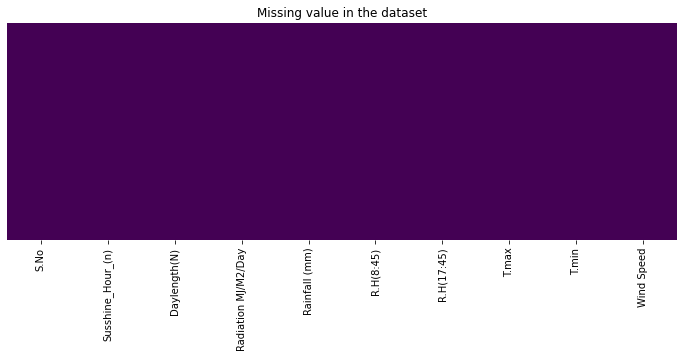

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

we have not null values in the given data set

checking the correletion between the dependant and independant variable

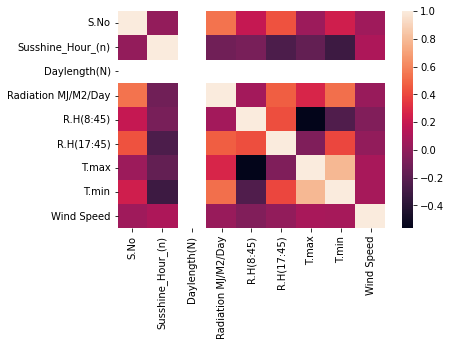

In [ ]:
import seaborn as sns
sns.heatmap(df.corr());

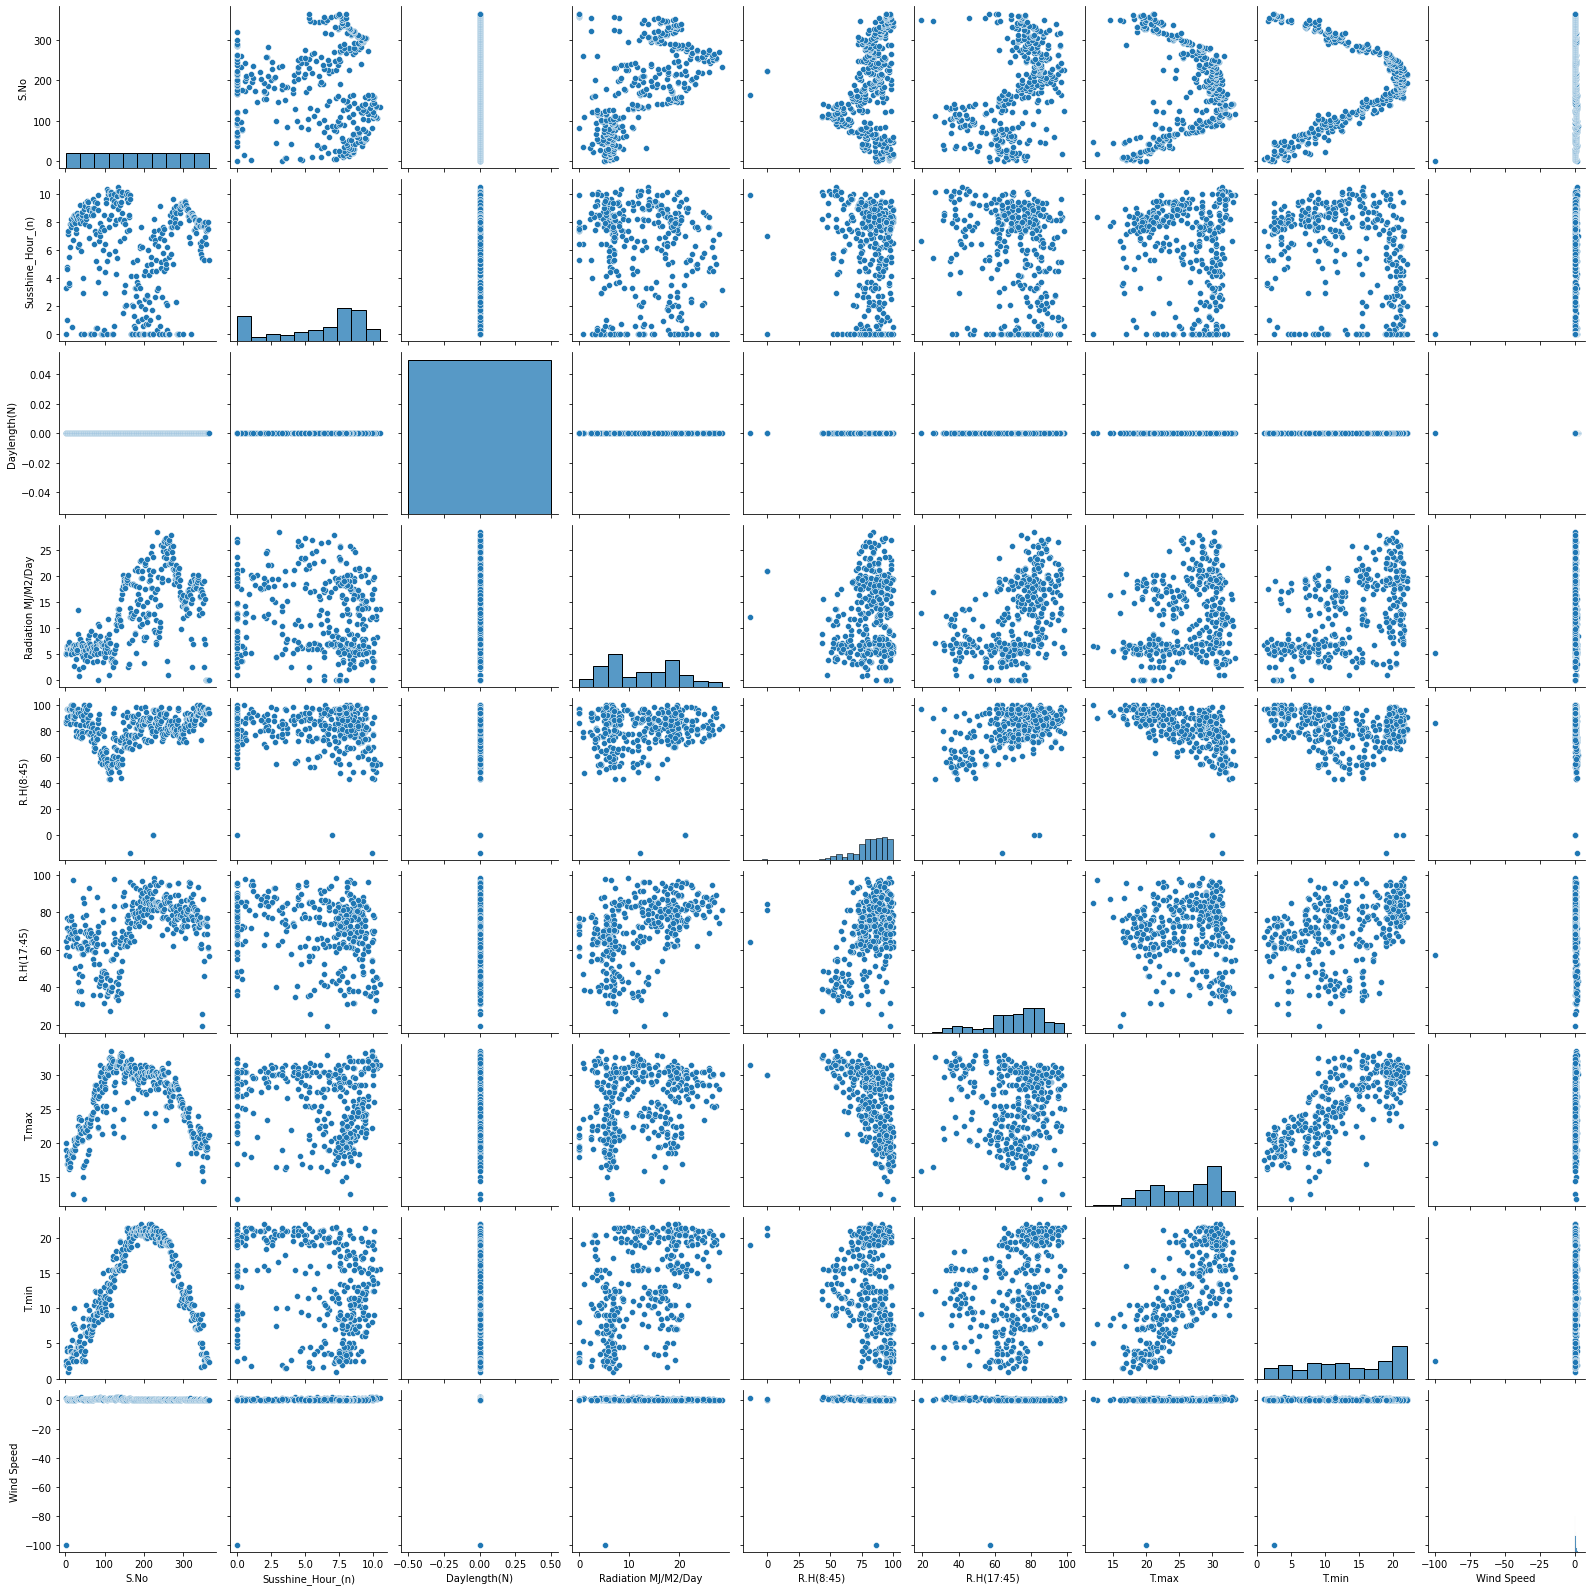

In [ ]:
sns.pairplot(df)

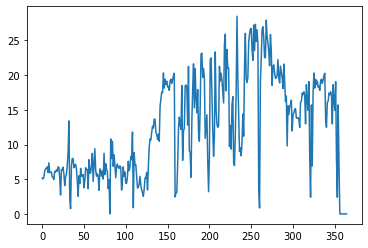

In [ ]:
df['Radiation MJ/M2/Day'].plot()

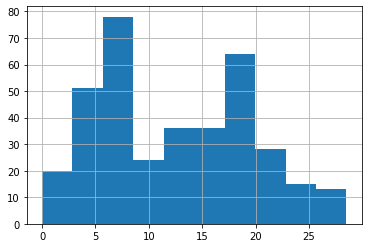

In [ ]:
df['Radiation MJ/M2/Day'].hist()

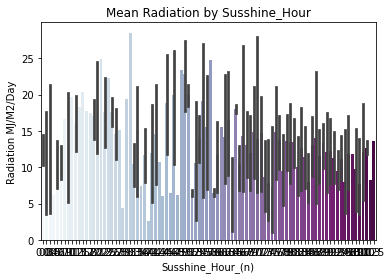

In [ ]:
ax = plt.axes()
sns.barplot(x="Susshine_Hour_(n)", y='Radiation MJ/M2/Day', data=df, palette="BuPu", ax = ax)
ax.set_title('Mean Radiation by Susshine_Hour')
plt.show()

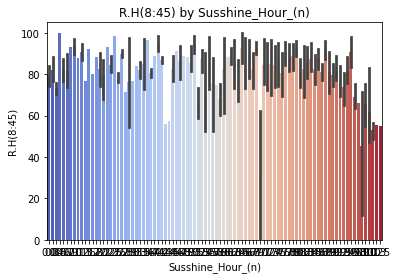

In [ ]:
ax = plt.axes()
sns.barplot(x="Susshine_Hour_(n)", y='R.H(8:45)', data=df, palette=("coolwarm"), ax = ax)
ax.set_title('R.H(8:45) by Susshine_Hour_(n)')
plt.show()

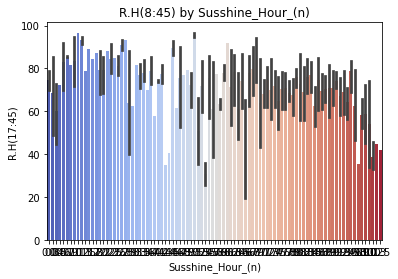

In [ ]:
ax = plt.axes()
sns.barplot(x="Susshine_Hour_(n)", y='R.H(17:45)', data=df, palette=("coolwarm"), ax = ax)
ax.set_title('R.H(8:45) by Susshine_Hour_(n)')
plt.show()

Text(0.5, 0.98, 'Temp max vs. Radiation')

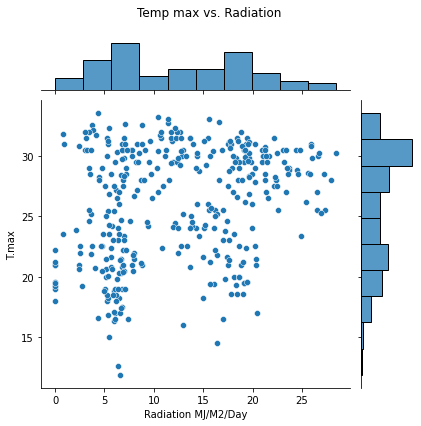

In [ ]:
g = sns.jointplot(x="Radiation MJ/M2/Day", y="T.max", data=df)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp max vs. Radiation')

Text(0.5, 0.98, 'Temp min vs. Radiation')

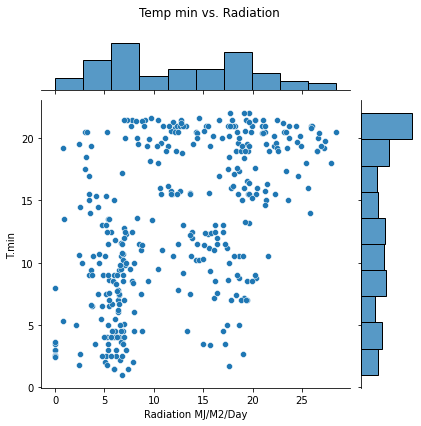

In [ ]:
g = sns.jointplot(x="Radiation MJ/M2/Day", y="T.min", data=df)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp min vs. Radiation')

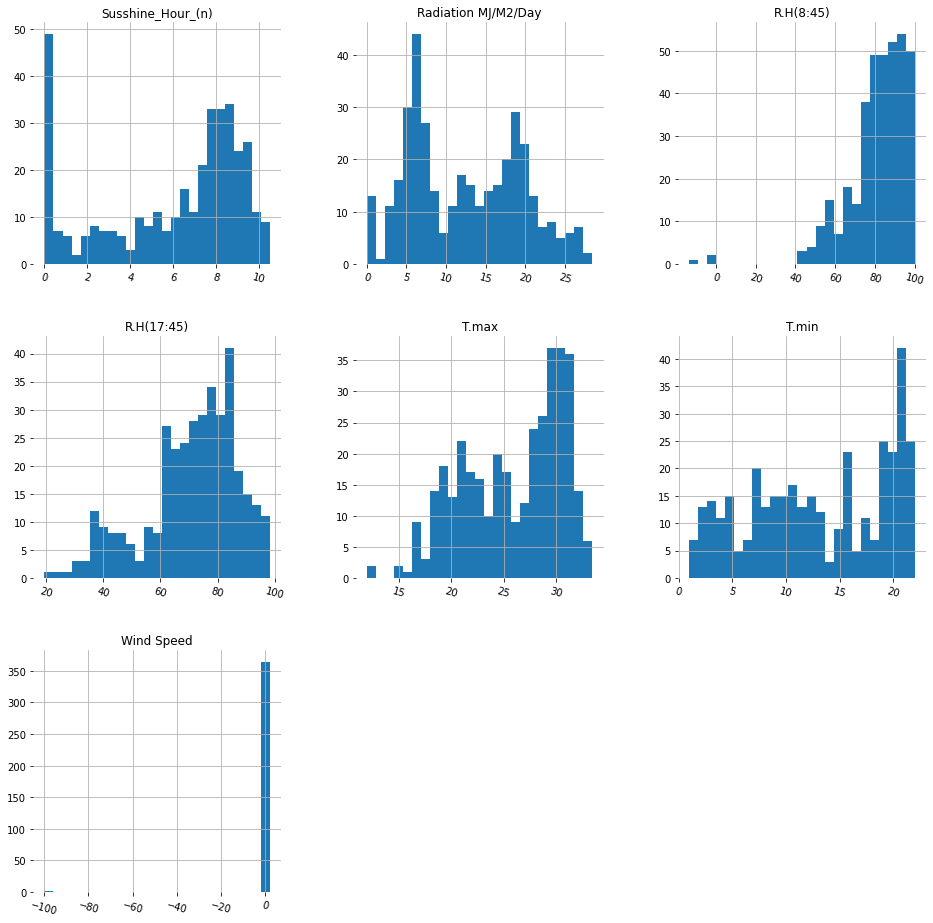

In [ ]:
df1=df[['Susshine_Hour_(n)' ,'Radiation MJ/M2/Day', 'R.H(8:45)', 'R.H(17:45)', 'T.max',
       'T.min', 'Wind Speed']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [ ]:
df['Susshine_Hour_(n)'] = df['Susshine_Hour_(n)'].astype(float)

In [ ]:
final_data=df.drop(['S.No','Daylength(N)','Rainfall (mm)'],axis=1)
print(final_data)

     Susshine_Hour_(n)  Radiation MJ/M2/Day  R.H(8:45)  R.H(17:45)  T.max  \
0                  0.0             5.165280       86.1        57.1   20.0   
1                  3.3             5.033088       88.2        65.0   19.0   
2                  1.0             5.278930       96.8        71.8   18.0   
3                  4.8             6.117552       88.9        76.9   17.0   
4                  4.6             6.509232       91.2        61.4   18.2   
..                 ...                  ...        ...         ...    ...   
360                7.4             0.000000       97.0        76.9   18.0   
361                7.4             0.000000       97.1        68.7   19.5   
362                7.5             0.000000       97.1        60.8   21.0   
363                8.0             0.000000       94.1        61.6   21.0   
364                5.3             0.000000       94.0        56.5   21.2   

     T.min  Wind Speed  
0      2.5       -99.9  
1      2.0         1.5  


In [ ]:
final_y=final_data.pop('Radiation MJ/M2/Day')


In [ ]:
print(final_y)

0      5.165280
1      5.033088
2      5.278930
3      6.117552
4      6.509232
         ...   
360    0.000000
361    0.000000
362    0.000000
363    0.000000
364    0.000000
Name: Radiation MJ/M2/Day, Length: 365, dtype: float64


In [ ]:
final_x=final_data
print(final_x)

     Susshine_Hour_(n)  R.H(8:45)  R.H(17:45)  T.max  T.min  Wind Speed
0                  0.0       86.1        57.1   20.0    2.5       -99.9
1                  3.3       88.2        65.0   19.0    2.0         1.5
2                  1.0       96.8        71.8   18.0    1.8         0.7
3                  4.8       88.9        76.9   17.0    4.4         0.4
4                  4.6       91.2        61.4   18.2    4.0         0.6
..                 ...        ...         ...    ...    ...         ...
360                7.4       97.0        76.9   18.0    2.5         0.4
361                7.4       97.1        68.7   19.5    2.6         0.3
362                7.5       97.1        60.8   21.0    2.5         0.3
363                8.0       94.1        61.6   21.0    2.5         0.4
364                5.3       94.0        56.5   21.2    2.4         0.4

[365 rows x 6 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.33, random_state=42)
#X_train.head()
#xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
rf= RandomForestRegressor(n_estimators=200)
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)

In [ ]:
print(f"Accuracy-: {r2_score(y_test, ypred)}\n")

print(f'MAE:{mae(y_test,ypred)}')
print(f'MSE:{mse(y_test,ypred)}')
print(f'RMSE:{np.sqrt(mse(y_test,ypred))}')

Accuracy-: 0.44927091182763823

MAE:4.042112034219807
MSE:28.252068639656876
RMSE:5.315267504054417


Text(0, 0.5, 'Predicted Y')

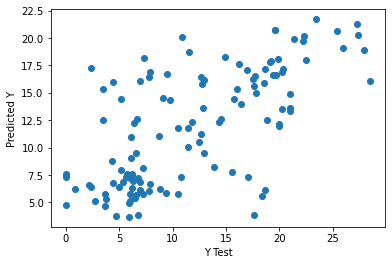

In [ ]:
plt.scatter(y_test,ypred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

cross validation

In [ ]:
cs=cross_val_score(rf,X_train,y_train,cv=10)
np.mean(cs)

0.3048434627744066

In [ ]:
param_grid = {'n_estimators': np.arange(200,400, 10),
              'max_depth': np.arange(4, 21),
              'min_samples_split': [0.001, 0.01, 0.1, 2],
              'min_samples_leaf': [0.001, 0.01, 0.1, 1],
              'max_features': np.arange(3, 7), 
              'n_jobs': [-1]
              }

rf = RandomForestRegressor()
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=25, scoring='neg_mean_squared_error', n_jobs=-1, refit=True)
random_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'max_features': array([3, 4, 5, 6]),
                                        'min_samples_leaf': [0.001, 0.01, 0.1,
                                                             1],
                                        'min_samples_split': [0.001, 0.01, 0.1,
                                                              2],
                                        'n_estimators': array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320,
       330, 340, 350, 360, 370, 380, 390]),
                                        'n_jobs': [-1]},
                   scoring='neg_mean_squared_error')

In [ ]:
ypred=random_search.predict(X_test)

In [ ]:
print(f"Accuracy-: {r2_score(y_test, ypred)}\n")

print(f'MAE:{mae(y_test,ypred)}')
print(f'MSE:{mse(y_test,ypred)}')
print(f'RMSE:{np.sqrt(mse(y_test,ypred))}')

Accuracy-: 0.45825754696146304

MAE:4.146200845277108
MSE:27.791059700610408
RMSE:5.2717226501979795


In [ ]:
cs=cross_val_score(rf,X_train,y_train,cv=10)
np.mean(cs)

0.30559796457608696